<a href="https://colab.research.google.com/github/sebct0402/Proyectos---Python/blob/main/An%C3%A1lisis_Exploratorio_Datos_Admitidos_Icesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An√°lsis Exploratorio de datos - Proyecto de Clasifici√≥n para Estudiantes y Facultades de la Universidad Icesi

Grupo conformado por:
- Carlos Tafur.
- Miguel Jaramillo.
- Juan Yustes.
- Sebasti√°n Correa.

##Carga de datos y librer√≠as a usar

In [ ]:
#Aqu√≠ se cargan todas las librer√≠as necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora carguemos el dataframe en una variable. Inicialmente los datos fueron decodificados en "latin-1" pues mediante UFT-8 la carga no se ejecut√≥.

In [ ]:
df = pd.read_csv(
    '/content/Admitidos_2018-2025_anonimizado.csv',
    sep=';',
    encoding='latin-1',  #Se carga en latin-1 puesto que el formato en UFT-8 nos genera un error de carga
    low_memory=False)

##Limpieza inicial de Datos.

Veamos nuestro conjunto de datos cargados.

In [ ]:
df.head()

Periodo Admisi√É¬≥n Fecha Inscripci√É¬≥n Fecha solicitud completada Programa  \
0           201720.0         26/09/2017                        NaN      ADD   
1           201810.0         21/11/2017                 21/11/2017      ADD   
2           201810.0         21/10/2017                 21/10/2017      ADD   
3           201810.0         28/11/2017                 27/11/2017      ADD   
4           201810.0          5/01/2018                 10/01/2018      ADD   

  Tipo ID Fecha Nacimiento Puntaje Icfes Fecha Icfes Puesto Icfes  \
0      CC        2/03/1999         336.0  12/03/2017         76.0   
1      CC       24/04/2000         336.0  27/08/2017          NaN   
2      CC       20/07/1988           NaN  26/03/2006        233.0   
3      TI       22/03/2001         330.0  27/08/2017          NaN   
4      CC       11/08/1999         327.0  31/07/2016          NaN   

  C√É¬≥digo Colegio  ... Cr√É¬©ditos U Valor Icetex Valor matricula  \
0          C01407  ...         NaN          0.0             0.0   
1          C07849  ...         NaN   18660000.0             0.0   
2          C01454  ...         NaN          0.0       9090000.0   
3          C08338  ...         NaN          0.0             0.0   
4          C07849  ...         NaN   72854000.0       9090000.0   

  Valor procultura Cr√É¬©ditos U (PCR) Fecha pago matricula Valor matricula.1  \
0              0.0               0.0                  NaN               0.0   
1              0.0               0.0                  NaN               0.0   
2         136350.0               0.0            2/01/2018         9226350.0   
3              0.0               0.0                  NaN               0.0   
4         136350.0               0.0           11/01/2018         9226350.0   

  Saldo Pre              source_file Unnamed: 78  
0       0.0  201810 - 12-02-2025.csv         NaN  
1       0.0  201810 - 12-02-2025.csv         NaN  
2       0.0  201810 - 12-02-2025.csv         NaN  
3       0.0  201810 - 12-02-2025.csv         NaN  
4       0.0  201810 - 12-02-2025.csv         NaN  

[5 rows x 79 columns]

In [ ]:
df.shape

(20154, 79)

Encontramos un total del 77 columnas y 16676 registros.

Cabe aclarar que el dataframe original conten√≠a un total de 96 columnas de las cuales fueron eliminadas 19, pues estas representaban datos sensibles que permit√≠an identificar y/o contactar a personas reales.

Adem√°s, conocemos que la informaci√≥n se encuentra actualizada hasta agosto de 2024; por lo que esta podr√≠a ser una limitaci√≥n del proyecto y se buscar√° en pr√≥ximas versiones obtener informaci√≥n m√°s actualizada.

### Problema de codificaci√≥n

Detectamos un error de codificaci√≥n que genera caracteres extra√±os en los datos que contienen tildes y la letra "√±" (Tambi√©n conocido como mojibake). Este problema se origin√≥ durante la carga de los datos y no pudo ser corregido en ese momento. Para solucionarlo, aplicaremos la codificaci√≥n UTF-8 √∫nicamente en las partes donde se presenta el error, ya que reconvertir todas las columnas provocaba fallas en la ejecuci√≥n.

In [ ]:
import pandas as pd

def fix_mojibake(x):
    if isinstance(x, str):
        # Solo intentamos corregir si "huele" a mojibake com√∫n
        if any(bad in x for bad in ("√É", "√Ç", "√¢‚Ç¨", "√¢‚Ç¨‚Ñ¢", "√¢‚Ç¨≈ì", "√¢‚Ç¨\x9d")):
            for enc in ("latin1", "cp1252"):  # probar variantes comunes de Windows
                try:
                    return x.encode(enc).decode("utf-8")
                except (UnicodeEncodeError, UnicodeDecodeError):
                    pass
        return x
    return x

# Opci√≥n A: pandas >= 2.2 (tiene DataFrame.map)
if hasattr(pd.DataFrame, "map"):
    df = df.map(fix_mojibake)
else:
    # Opci√≥n B: versiones anteriores: usar Series.map por columna de texto
    for c in df.select_dtypes(include=["object", "string"]).columns:
        df[c] = df[c].map(fix_mojibake)


In [ ]:
df.head()

Periodo Admisi√É¬≥n Fecha Inscripci√É¬≥n Fecha solicitud completada Programa  \
0           201720.0         26/09/2017                        NaN      ADD   
1           201810.0         21/11/2017                 21/11/2017      ADD   
2           201810.0         21/10/2017                 21/10/2017      ADD   
3           201810.0         28/11/2017                 27/11/2017      ADD   
4           201810.0          5/01/2018                 10/01/2018      ADD   

  Tipo ID Fecha Nacimiento Puntaje Icfes Fecha Icfes Puesto Icfes  \
0      CC        2/03/1999         336.0  12/03/2017         76.0   
1      CC       24/04/2000         336.0  27/08/2017          NaN   
2      CC       20/07/1988           NaN  26/03/2006        233.0   
3      TI       22/03/2001         330.0  27/08/2017          NaN   
4      CC       11/08/1999         327.0  31/07/2016          NaN   

  C√É¬≥digo Colegio  ... Cr√É¬©ditos U Valor Icetex Valor matricula  \
0          C01407  ...         NaN          0.0             0.0   
1          C07849  ...         NaN   18660000.0             0.0   
2          C01454  ...         NaN          0.0       9090000.0   
3          C08338  ...         NaN          0.0             0.0   
4          C07849  ...         NaN   72854000.0       9090000.0   

  Valor procultura Cr√É¬©ditos U (PCR) Fecha pago matricula Valor matricula.1  \
0              0.0               0.0                  NaN               0.0   
1              0.0               0.0                  NaN               0.0   
2         136350.0               0.0            2/01/2018         9226350.0   
3              0.0               0.0                  NaN               0.0   
4         136350.0               0.0           11/01/2018         9226350.0   

  Saldo Pre              source_file Unnamed: 78  
0       0.0  201810 - 12-02-2025.csv         NaN  
1       0.0  201810 - 12-02-2025.csv         NaN  
2       0.0  201810 - 12-02-2025.csv         NaN  
3       0.0  201810 - 12-02-2025.csv         NaN  
4       0.0  201810 - 12-02-2025.csv         NaN  

[5 rows x 79 columns]

Finalmente corrijamos las columnas

In [ ]:
df.columns = df.columns.str.encode('latin1').str.decode('utf-8')
df.columns

Index(['Periodo Admisi√≥n', 'Fecha Inscripci√≥n', 'Fecha solicitud completada',
       'Programa', 'Tipo ID', 'Fecha Nacimiento', 'Puntaje Icfes',
       'Fecha Icfes', 'Puesto Icfes', 'C√≥digo Colegio', 'Nombre Colegio',
       'Ciudad Colegio', 'Categor√≠a', 'Calendario', 'Naturaleza',
       'Clasificaci√≥n', 'Poblaci√≥n', 'Jornada', 'Estrato', 'Edad Aproximada',
       'G√©nero', 'Ciudad Residencia', 'Ciudad Nacimiento',
       'Reserva Cupo Anterior', 'Reserva Cupo Actual', 'Fecha Reserva Cupo',
       'Posible Reserva', 'No Toma Cupo', 'Icetex Aprobado', 'Icetex Estudio',
       'Admitido', 'Fecha Admisi√≥n', 'Fecha no Admisi√≥n', 'Fecha Entrevista',
       'Resultado Entrevista', 'Decisi√≥n Pendiente', 'Fecha Comentarios',
       'Comentarios Antiguos', 'Fecha Comentarios Antiguos', 'Matr√≠cula',
       'Fecha L√≠mite', 'Beca Gobierno', 'Beca Icesos Acces', 'Beca Excelencia',
       'Otra Beca', 'Matem√°ticas', 'Lectura Cr√≠tica', 'Sociales Ciudadanas',
       'Naturales', 'Ingl

### Filtrado de datos y columnas de utilidad

Para trabajar m√°s eficientemente sobre las columnas que realmente aportan a nuestro an√°lisis, primero aseguremonos de que los registros empleados son los adecuados.

En primer lugar, s√≥lo necesitamos aquellos registros de estudiantes que han sido admitidos, por lo que filtremos nuestros datos:

In [ ]:
df = df[df['Admitido'] == 'S√≠']

In [ ]:
df.shape

(15765, 79)

De los 16676 iniciales, encontramos 13167 registros de estudiantes que fueron admitidos. Eso significa que se eliminaron 3509 registros de estudiantes no admitidos.


Procedamos ahora a verificar el tipo de dato y los faltantes de cada fila.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15765 entries, 0 to 20153
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Periodo Admisi√≥n              15704 non-null  float64
 1   Fecha Inscripci√≥n             15765 non-null  object 
 2   Fecha solicitud completada    11500 non-null  object 
 3   Programa                      15765 non-null  object 
 4   Tipo ID                       15607 non-null  object 
 5   Fecha Nacimiento              15763 non-null  object 
 6   Puntaje Icfes                 14362 non-null  object 
 7   Fecha Icfes                   14442 non-null  object 
 8   Puesto Icfes                  226 non-null    object 
 9   C√≥digo Colegio                15287 non-null  object 
 10  Nombre Colegio                15246 non-null  object 
 11  Ciudad Colegio                15218 non-null  object 
 12  Categor√≠a                     13503 non-null  object 
 13  Ca

Encontramos un par de filas sin registros, procederemos a eliminarla

In [ ]:
df.drop(['Prueba Sigma', 'Calificaci√≥n Normalizada MED', 'Fecha no Admisi√≥n'], axis=1, inplace=True)

## An√°lisis univariado

### Variable Puntaje Icfes

Relevancia de la variable 'Puntaje Icfes' en el contexto de predecir la elecci√≥n de facultad:

El 'Puntaje Icfes' es altamente relevante en este proyecto teniendo en cuenta que el objetivo es predecir la elecci√≥n de facultad bas√°ndose en datos acad√©micos y demogr√°ficos, pues esta es una de las m√©tricas m√°s importantes disponibles en el conjunto de datos y un indicador clave del rendimiento acad√©mico previo del estudiante.

Veamos ahora cada punto clave de por qu√© el puntaje Icfes puede ser una variable de relevancia (predicci√≥n de elecci√≥n de facultad):

* Poder predictivo: Es muy probable que el 'Puntaje Icfes' sea una variable con
un poder predictivo significativo para la elecci√≥n de facultad, ya que algunas facultades o programas pueden atraer a estudiantes con puntajes ICFES m√°s altos debido a la percepci√≥n de rigor acad√©mico o requisitos de admisi√≥n m√°s exigentes, como por ejemplo, las facultades de Ingenier√≠as o Ciencias de la Salud tienen una mayor proporci√≥n de estudiantes con puntajes elevados en comparaci√≥n con otras facultades.

* Segmentaci√≥n de estudiantes: El an√°lisis del 'Puntaje Icfes' en relaci√≥n con la elecci√≥n de facultad puede ayudar a identificar patrones y segmentos de estudiantes, siendo esto valioso para "mejorar la planificaci√≥n acad√©mica" y "dise√±ar campa√±as de mercadeo m√°s efectivas", como se ha mencionado en la justificaci√≥n del proyecto. Si se identifica que estudiantes con ciertos rangos de puntaje ICFES tienden a elegir facultades espec√≠ficas, la universidad puede dirigir sus esfuerzos de divulgaci√≥n y marketing de manera m√°s eficiente.

* Identificaci√≥n de tendencias a lo largo del tiempo: Al tener datos de 2018 a 2024, se puede analizar si la relaci√≥n entre el 'Puntaje Icfes' y la elecci√≥n de facultad ha cambiado con el tiempo y esto es relevante para la "captaci√≥n y retenci√≥n de estudiantes" mencionada en el objetivo, ya que las tendencias en los puntajes de los estudiantes que eligen ciertas facultades pueden informar las estrategias de reclutamiento y adaptaci√≥n de programas a lo largo de los a√±os.

* Base para modelos de clasificaci√≥n: Como se indica en la justificaci√≥n, se planean construir modelos de clasificaci√≥n predictivos, y el 'Puntaje Icfes' ser√° una caracter√≠stica fundamental en estos modelos para predecir a qu√© facultad es m√°s probable que se inscriba un estudiante.


En conclusi√≥n, la variable 'Puntaje Icfes' es esencial para lograr el objetivo de predecir la elecci√≥n de facultad, ya que proporciona informaci√≥n acad√©mica clave que probablemente influye en esta decisi√≥n y permite segmentar a los estudiantes para mejorar las estrategias de la universidad en cuanto a planificaci√≥n, marketing e Identificaci√≥n de tendencias a lo largo del tiempo.

Iniciemos obteniendo la estad√≠stica descriptiva de la variable de inter√©s:

In [ ]:
df['Puntaje Icfes'].describe()

count     14362
unique      447
top       350.0
freq        199
Name: Puntaje Icfes, dtype: object

A simple vista encontramos algunos valores con poco sentido, c√≥mo lo son puntajes de 999 o 0 en estas pruebas, visualicemoslo mejor desde un diagrama de cajas y un histograma.

In [ ]:
df['Puntaje Icfes'].isnull().sum()

np.int64(1403)

Tambi√©n se debe tener en cuenta que existen varios valores faltanes, posteriormente se deber√° verificar la raz√≥n de estos faltantes. Algunas hip√≥tesis para esta cantidad son la pandemia (Donde no se presentaron este tipo de pruebas), estudiantes extranjeros y estudiantes con icfes muy antiguos (Cuya escala de valores no coincide con el actual).

In [ ]:
col_icfes = "Puntaje Icfes"

# normaliza el texto y convierte a num√©rico
s = (
    df[col_icfes]
      .astype(str)
      .str.strip()
      .str.replace(",", ".", regex=False)         # decimales con coma ‚Üí punto
      .str.replace(r"[^0-9.\-]", "", regex=True)  # quita s√≠mbolos/texteo
)

df[col_icfes] = pd.to_numeric(s, errors="coerce")
df[col_icfes].dtype  # deber√≠a mostrar float64


dtype('float64')

In [ ]:
# ICFES va de 0 a 500; fuera de rango ‚Üí NaN para no da√±ar an√°lisis/gr√°fico
df.loc[~df[col_icfes].between(0, 500), col_icfes] = np.nan

# chequeos r√°pidos
n_null = df[col_icfes].isna().sum()
n_out = (~s.isna() & ~df[col_icfes].between(0, 500)).sum()  # si quieres ver cu√°ntos se fueron por rango
n_null, n_out


(np.int64(1406), np.int64(1406))

<Axes: ylabel='Frequency'>

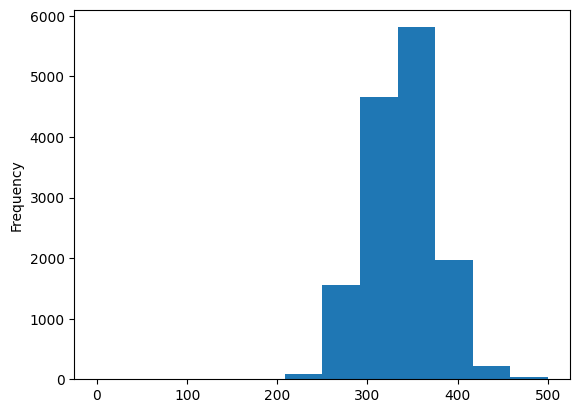

In [ ]:
df['Puntaje Icfes'].plot(kind='hist', bins=12)

Ahora verifiquemos los registros que presentan valores mayores a 500.

In [ ]:
print(df[df['Puntaje Icfes'] > 500])

Empty DataFrame
Columns: [Periodo Admisi√≥n, Fecha Inscripci√≥n, Fecha solicitud completada, Programa, Tipo ID, Fecha Nacimiento, Puntaje Icfes, Fecha Icfes, Puesto Icfes, C√≥digo Colegio, Nombre Colegio, Ciudad Colegio, Categor√≠a, Calendario, Naturaleza, Clasificaci√≥n, Poblaci√≥n, Jornada, Estrato, Edad Aproximada, G√©nero, Ciudad Residencia, Ciudad Nacimiento, Reserva Cupo Anterior, Reserva Cupo Actual, Fecha Reserva Cupo, Posible Reserva, No Toma Cupo, Icetex Aprobado, Icetex Estudio, Admitido, Fecha Admisi√≥n, Fecha Entrevista, Resultado Entrevista, Decisi√≥n Pendiente, Fecha Comentarios, Comentarios Antiguos, Fecha Comentarios Antiguos, Matr√≠cula, Fecha L√≠mite, Beca Gobierno, Beca Icesos Acces, Beca Excelencia, Otra Beca, Matem√°ticas, Lectura Cr√≠tica, Sociales Ciudadanas, Naturales, Ingl√©s, Razonamiento Cuantitativo, Competencias Ciudadanas, DEBE VER ICARO, Matriculado √çcaro, Debe ver Papiro, Matriculado Papiro, Debe ver PROBO, Matriculado PROBO, Transferencia, Intercambio

de la misma forma, verifiquemos los registros que presentan valores de 0.

In [ ]:
print(df[df['Puntaje Icfes'] == 0])

      Periodo Admisi√≥n Fecha Inscripci√≥n Fecha solicitud completada Programa  \
1624          201820.0        23/05/2018                 22/05/2018      ANT   

     Tipo ID Fecha Nacimiento  Puntaje Icfes Fecha Icfes Puesto Icfes  \
1624      CC        9/08/1982            0.0  19/08/2000        100.0   

     C√≥digo Colegio  ...                                         Cr√©ditos U  \
1624         C01338  ...  CCR - Cargo Plan de pagos - Credito Icesi, PCR...   

     Valor Icetex Valor matricula Valor procultura Cr√©ditos U (PCR)  \
1624          0.0       6890000.0         103350.0              0.0   

     Fecha pago matricula Valor matricula.1 Saldo Pre  \
1624           14/06/2018         6993350.0       0.0   

                  source_file Unnamed: 78  
1624  201820 - 12-02-2025.csv         NaN  

[1 rows x 76 columns]


Observamos que son s√≥lo 3 casos aislados, por lo que se proceder√° con la eliminaci√≥nd de estos registros.

In [ ]:
#indices = df[(df['Puntaje Icfes'] > 500)].index
#df.drop(indices, inplace=True)
#indices = df[df['Puntaje Icfes'] == 0].index
#df.drop(indices, inplace=True)

# Forma compacta de hacer el calculo
df = df[df['Puntaje Icfes'].between(1, 500)]

Ahora volvamos a analizar esta variable sin aquellos registros extra√±os.

In [ ]:
df['Puntaje Icfes'].describe()

count    14358.000000
mean       338.117844
std         38.190384
min        198.000000
25%        313.000000
50%        340.000000
75%        364.000000
max        500.000000
Name: Puntaje Icfes, dtype: float64

Tras depurar valores fuera de rango (>*500) y ceros, la variable Puntaje Icfes queda con 14.538 observaciones. El promedio es 338.17 con desviaci√≥n est√°ndar de 38.19. El m√≠nimo observado es 198 y el m√°ximo es 500, valor que coincide con el tope de la escala y sugiere un techo/cap en algunos registros. La mediana es 340, y el 50% central de los datos (IQR) se ubica entre 313 (Q1) y 364 (Q3).

Volvamos a obtener los gr√°ficos de caja y el histograma de la variable.

<Axes: >

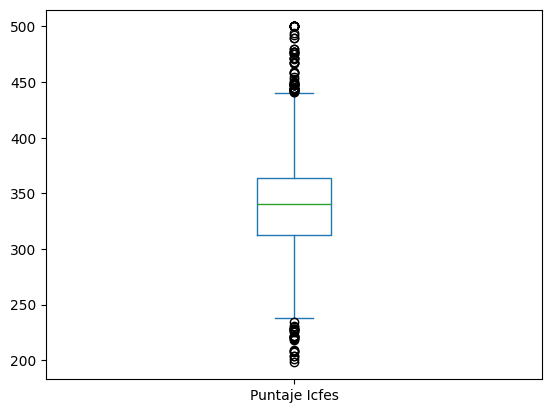

In [ ]:
df['Puntaje Icfes'].plot(kind='box')

In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = df["Puntaje Icfes"].quantile(0.25)
Q3 = df["Puntaje Icfes"].quantile(0.75)
IQR = Q3 - Q1

# L√≠mites del boxplot
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar outliers
outliers_inf = (df["Puntaje Icfes"] < limite_inferior).sum()
outliers_sup = (df["Puntaje Icfes"] > limite_superior).sum()
outliers_total = outliers_inf + outliers_sup

print("L√≠mite inferior:", limite_inferior)
print("L√≠mite superior:", limite_superior)
print("Outliers por debajo del l√≠mite inferior:", outliers_inf)
print("Outliers por encima del l√≠mite superior:", outliers_sup)
print("Total de outliers:", outliers_total)

L√≠mite inferior: 236.5
L√≠mite superior: 440.5
Outliers por debajo del l√≠mite inferior: 28
Outliers por encima del l√≠mite superior: 67
Total de outliers: 95


A partir del criterio de 1.5¬∑IQR, se identificaron 95 observaciones at√≠picas (‚âà0.65% del total de 14,538 registros). De estas, 28 se ubican por debajo del l√≠mite inferior (<236.5) y 67 por encima del l√≠mite superior (>440.5).

Valores superiores: se encuentran en el rango alto de la escala (hasta 500). Son plausibles y no constituyen un error, ya que reflejan desempe√±os sobresalientes que incluso suelen ser incentivados por la universidad en sus procesos de admisi√≥n.

Valores inferiores: aunque factibles (m√≠nimo observado tras depuraci√≥n: 198), ameritan una revisi√≥n m√°s detallada. Es recomendable analizar si corresponden a periodos espec√≠ficos, cohortes antiguas, estudiantes extranjeros o posibles errores de digitaci√≥n.

En conclusi√≥n, los outliers altos son naturales y esperables, mientras que los bajos requieren un an√°lisis contextual para determinar si responden a condiciones acad√©micas reales o a inconsistencias en el registro.

<Axes: ylabel='Frequency'>

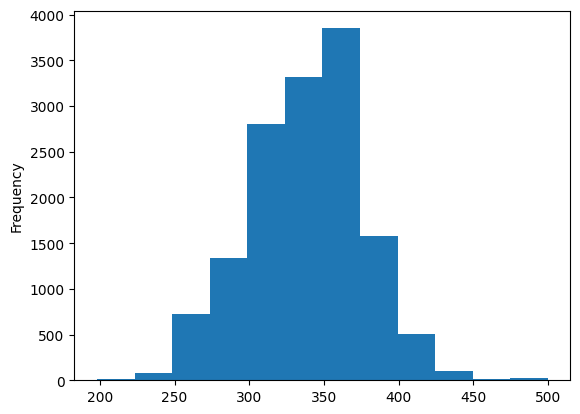

In [ ]:
df['Puntaje Icfes'].plot(kind='hist', bins=12)

Podemos visualizar en este histograma una distribuci√≥n muy similar a la normal, lo cu√°l es un comportamient esperado en la variable.

**Conclusiones y observaciones respecto al an√°lisis univariado de "Puntaje Icfes":**

*	La mitad de los estudiantes se encuentra dentro del rango comprendido entre 312 y 364 puntos.
*	Se detectaron valores at√≠picos irreales como 0, 504 y 999, que fueron depurados del dataset para no distorsionar los resultados.
* Existen un total de 61 otros valores at√≠picos para los cu√°les se deber√° definir si existir√° alg√∫n tratamiento y justificaci√≥n para ellos.
*	La distribuci√≥n de la variable se acerca a la normalidad.
* Se deber√° hacer un tratamiento para los 1225 registros con nulos en "Puntaje Icfes".

Tambi√©n consideremos las posibilidades de an√°lisis relacionando otras variables. Por ejemplo, ser√≠a significativo verificar el comportamiento de esta variable con respecto al periodo de ingreso, edad, facultad (variable target) y entre otras.

### Todas las dem√°s variables

In [ ]:
df.describe()

Periodo Admisi√≥n  Puntaje Icfes   Matem√°ticas  Lectura Cr√≠tica  \
count      14301.000000   14358.000000  13782.000000     13746.000000   
mean      202199.766730     338.117844     68.427949        67.476502   
std          238.701524      38.190384     11.253019         9.259411   
min       201420.000000     198.000000      0.000000         0.000000   
25%       202010.000000     313.000000     62.000000        63.000000   
50%       202220.000000     340.000000     69.000000        68.000000   
75%       202410.000000     364.000000     75.000000        73.000000   
max       202610.000000     500.000000    100.000000       100.000000   

       Sociales Ciudadanas        Ingl√©s    Valor beca  Valor Icetex  \
count         13596.000000  12493.000000  1.435800e+04  1.435800e+04   
mean             66.104442     71.976547  5.818850e+05  1.613549e+07   
std              10.528057     11.976710  1.961104e+06  3.549427e+07   
min               0.000000      0.000000  0.000000e+00  0.000000e+00   
25%              61.000000     65.000000  0.000000e+00  0.000000e+00   
50%              67.000000     73.000000  0.000000e+00  0.000000e+00   
75%              72.000000     80.000000  0.000000e+00  0.000000e+00   
max             100.000000    100.000000  2.541000e+07  2.881300e+08   

       Valor matricula  Valor procultura  Cr√©ditos U (PCR)  Valor matricula.1  \
count     1.418200e+04      1.418200e+04      1.421500e+04       1.435800e+04   
mean      7.714894e+06      1.179281e+05      4.739187e+05       7.736525e+06   
std       6.576629e+06      1.062911e+05      2.020816e+06       6.692978e+06   
min       0.000000e+00      0.000000e+00      0.000000e+00       0.000000e+00   
25%       0.000000e+00      0.000000e+00      0.000000e+00       0.000000e+00   
50%       9.130000e+06      1.369500e+05      0.000000e+00       9.241575e+06   
75%       1.157000e+07      1.735500e+05      0.000000e+00       1.174355e+07   
max       2.541000e+07      1.148438e+06      2.541000e+07       2.655844e+07   

          Saldo Pre    Unnamed: 78  
count  1.435800e+04    3391.000000  
mean   1.448356e+04   49147.480094  
std    5.067614e+05   37510.509628  
min   -1.052555e+07    1991.000000  
25%    0.000000e+00    9451.000000  
50%    0.000000e+00   53512.000000  
75%    0.000000e+00   54533.000000  
max    2.579115e+07  117734.000000

In [ ]:
df['Edad Aproximada'].describe()

count     14358
unique       57
top          19
freq       2098
Name: Edad Aproximada, dtype: object

In [ ]:
df.G√©nero.unique()

array(['M', 'F', 'N'], dtype=object)

##An√°lisis Bi-variado

<Axes: >

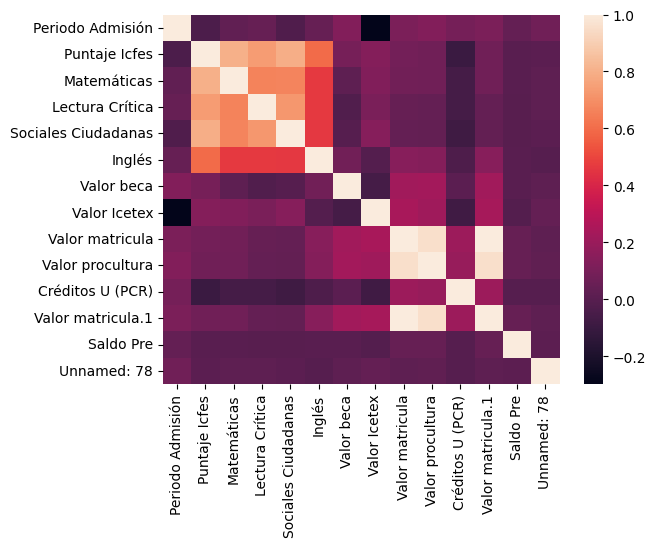

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr())

In [ ]:
df.Programa.unique()

array(['ADD', 'ANT', 'BIO', 'CIP', 'CLP', 'COF', 'DER', 'DIS', 'DMI',
       'ECO', 'ENI', 'IBQ', 'IND', 'LAT', 'LCN', 'LCS', 'LEI', 'LYL',
       'MED', 'MIP', 'MUS', 'PSI', 'QUF', 'QUI', 'SIS', 'SOC', 'TEL',
       'LBP', 'FIN', 'COM', 'IAG', 'IEI', 'BAC', 'MVZ', 'NET'],
      dtype=object)

In [ ]:
len(df.Programa.unique())

35

In [ ]:
indices = df[(df['Programa'] == 'ESH') & (df['Programa'] == 'PO000')].index


In [ ]:
df.Admitido.unique()

array(['S√≠'], dtype=object)

Verificar que el Dataframe exista, Detectar el nombre de las columnas que contienen eo codigo de las carreras y definir funciones de apoyo para graficar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Verificar que df existe ---
try:
    assert isinstance(df, pd.DataFrame)
except:
    raise RuntimeError("No encuentro el DataFrame 'df'. Aseg√∫rate de haber cargado los datos antes.")

# --- 2) Detectar la columna de c√≥digo de carrera ---
# Ajusta esta lista al nombre REAL de tu columna si difiere.
posibles_cols_codigo = ["CodigoCarrera", "C√≥digoCarrera", "codigo_carrera", "ProgramaCodigo", "Programa_Codigo"]
col_codigo = next((c for c in posibles_cols_codigo if c in df.columns), None)

# Si no existe una columna expl√≠cita de c√≥digo, intenta derivarla de otra columna (por ejemplo, 'Programa' o 'Carrera')
if col_codigo is None:
    posibles_cols_texto = ["Programa", "Carrera", "NombrePrograma", "NombreCarrera"]
    col_texto = next((c for c in posibles_cols_texto if c in df.columns), None)
    if col_texto is None:
        raise RuntimeError(
            "No encontr√© una columna de c√≥digo ni una de texto de programa/carrera.\n"
            "Revisa los nombres de columnas y ajusta 'posibles_cols_codigo' o 'posibles_cols_texto'."
        )
    # Derivar un 'C√≥digo' tomando las primeras 3 letras may√∫sculas (ajusta si tu convenci√≥n es distinta)
    col_codigo = "CodigoCarrera"
    df[col_codigo] = df[col_texto].astype(str).str.strip().str.upper().str[:3]

print(f"‚úÖ Columna de c√≥digo detectada/creada: '{col_codigo}'")

# --- 3) Funciones de apoyo para gr√°ficos (matplotlib puro) ---

def plot_barras_categorica(series, titulo, rot=0, top_n=None):
    """
    Dibuja barras para una serie categ√≥rica.
    - series: pd.Series con valores categ√≥ricos
    - top_n: si quieres mostrar solo las N categor√≠as m√°s frecuentes
    """
    vc = series.value_counts(dropna=False)
    if top_n is not None:
        vc = vc.head(top_n)
    plt.figure(figsize=(8,4))
    vc.plot(kind="bar")
    plt.title(titulo)
    plt.xlabel(series.name)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()

def plot_histograma_y_box(numeric_series, titulo_base):
    """
    Dibuja histograma y boxplot simples para una serie num√©rica.
    """
    # Histograma
    plt.figure(figsize=(7,4))
    numeric_series.dropna().plot(kind="hist", bins=20)
    plt.title(f"{titulo_base} - Histograma")
    plt.xlabel(numeric_series.name)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,3))
    plt.boxplot(numeric_series.dropna(), vert=True)
    plt.title(f"{titulo_base} - Boxplot")
    plt.ylabel(numeric_series.name)
    plt.tight_layout()
    plt.show()


‚úÖ Columna de c√≥digo detectada/creada: 'CodigoCarrera'


Definir diccionario de mapeo de facultades, usar el codigo de la carrera con clave de 3 letras, y revisar si faltan codigos a mapear.

In [ ]:
# ==========================================================
# üè∑Ô∏è Celda 2: Definir el diccionario de mapeo de FACULTAD
# - Usa el c√≥digo de la carrera como clave (3 letras)
# - Si te faltan c√≥digos, agr√©galos aqu√≠
# ==========================================================

mapa_codigo = {
    # Negocios y Econom√≠a
    "ADD": "Negocios y Econom√≠a","ADN": "Negocios y Econom√≠a","ENI": "Negocios y Econom√≠a",
    "ECO": "Negocios y Econom√≠a","COF": "Negocios y Econom√≠a","FIN": "Negocios y Econom√≠a","MIP": "Negocios y Econom√≠a",
    # Ingenier√≠a, Dise√±o y Ciencias Aplicadas
    "SIS": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas","IND": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",
    "TEL": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas","IBQ": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",
    "BIO": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas","QUI": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",
    "QFA": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas","DMI": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",
    "DIN": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas","DIS": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",
    "IEI": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas","IAG": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",
    "QUF": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",
    # Ciencias Humanas
    "ANT": "Ciencias Humanas","SOC": "Ciencias Humanas","CPO": "Ciencias Humanas","PSI": "Ciencias Humanas","DER": "Ciencias Humanas",
    "MUS": "Ciencias Humanas","LED": "Ciencias Humanas","LLE": "Ciencias Humanas","COM": "Ciencias Humanas",
    "CIP": "Ciencias Humanas","LEI": "Ciencias Humanas","LCS": "Ciencias Humanas","LYL": "Ciencias Humanas",
    "LCN": "Ciencias Humanas","LAT": "Ciencias Humanas",
    # Ciencias de la Salud
    "MED": "Ciencias de la Salud","BAC": "Ciencias de la Salud",

    #codigos nuevos
    "MVZ": "Ingenier√≠a, Dise√±o y Ciencias Aplicadas",  # Medicina Veterinaria y Zootecnia
    "PO0": "Ciencias Humanas",                         # Psicolog√≠a
    "CLP": "Ciencias Humanas",                         # Ciencia Pol√≠tica
    "LBP": "Ciencias Humanas",                         # Licenciatura en Lenguas Extranjeras (ajusta si es Biolog√≠a)
    "NET": "Negocios y Econom√≠a",
}

print("‚úÖ Diccionario de mapeo cargado. Total c√≥digos:", len(mapa_codigo))


‚úÖ Diccionario de mapeo cargado. Total c√≥digos: 42


In [ ]:
# =================================================================
# üß± Celda 3: Crear la columna 'facultad' y revisar posibles faltantes
# - Mapea cada c√≥digo de carrera a una facultad
# - Se√±ala los c√≥digos que no quedaron mapeados (para que los agregues)
# =================================================================

# Crear columna
df["facultad"] = df[col_codigo].map(mapa_codigo)

# Reportar c√≥digos no mapeados (si existen)
codigos_unicos = df[col_codigo].dropna().unique()
no_mapeados = sorted([c for c in codigos_unicos if c not in mapa_codigo])

print(f"‚úÖ Columna 'facultad' creada. Ejemplo:\n", df[[col_codigo, "facultad"]].head(), "\n")

if no_mapeados:
    print("‚ö†Ô∏è C√≥digos NO mapeados (agr√©galos a 'mapa_codigo'):", no_mapeados)
else:
    print("üéâ Todos los c√≥digos presentes quedaron mapeados.")


‚úÖ Columna 'facultad' creada. Ejemplo:
   CodigoCarrera             facultad
0           ADD  Negocios y Econom√≠a
1           ADD  Negocios y Econom√≠a
3           ADD  Negocios y Econom√≠a
4           ADD  Negocios y Econom√≠a
5           ADD  Negocios y Econom√≠a 

üéâ Todos los c√≥digos presentes quedaron mapeados.


In [ ]:
df["facultad"].describe()

count                                       14358
unique                                          4
top       Ingenier√≠a, Dise√±o y Ciencias Aplicadas
freq                                         5342
Name: facultad, dtype: object

Verificar que no queden c√≥digos sin mapear

In [ ]:
no_mapeados = sorted(c for c in df["CodigoCarrera"].dropna().unique() if c not in mapa_codigo)
print("No mapeados:", no_mapeados)
df["facultad"].isna().sum()


No mapeados: []


np.int64(0)

Chequeos r√°pidos de calidad de datos

In [ ]:
# Nulos y duplicados
display(df.isna().sum().sort_values(ascending=False))
print("Duplicados:", df.duplicated().sum())

# Tipos y rangos b√°sicos
display(df.describe(include="all"))


Razonamiento Cuantitativo    14300
Competencias Ciudadanas      14295
Puesto Icfes                 14214
Fecha Reserva Cupo           13223
Cr√©ditos U                   12478
                             ...  
Valor matricula.1                0
Saldo Pre                        0
source_file                      0
CodigoCarrera                    0
facultad                         0
Length: 78, dtype: int64

Duplicados: 3


Periodo Admisi√≥n Fecha Inscripci√≥n Fecha solicitud completada  \
count       14301.000000             14358                      10655   
unique               NaN              4207                       1723   
top                  NaN         5/05/2018                 13/12/2021   
freq                 NaN                81                         60   
mean       202199.766730               NaN                        NaN   
std           238.701524               NaN                        NaN   
min        201420.000000               NaN                        NaN   
25%        202010.000000               NaN                        NaN   
50%        202220.000000               NaN                        NaN   
75%        202410.000000               NaN                        NaN   
max        202610.000000               NaN                        NaN   

       Programa Tipo ID Fecha Nacimiento  Puntaje Icfes Fecha Icfes  \
count     14358   14327            14358   14358.000000       14358   
unique       35       9             3782            NaN         464   
top         MED      CC        5/04/2004            NaN  25/03/2021   
freq       2130    7880               19            NaN         818   
mean        NaN     NaN              NaN     338.117844         NaN   
std         NaN     NaN              NaN      38.190384         NaN   
min         NaN     NaN              NaN     198.000000         NaN   
25%         NaN     NaN              NaN     313.000000         NaN   
50%         NaN     NaN              NaN     340.000000         NaN   
75%         NaN     NaN              NaN     364.000000         NaN   
max         NaN     NaN              NaN     500.000000         NaN   

       Puesto Icfes C√≥digo Colegio  ... Valor matricula Valor procultura  \
count           144          14292  ...    1.418200e+04     1.418200e+04   
unique           88           1757  ...             NaN              NaN   
top            99.0         C00001  ...             NaN              NaN   
freq              9            342  ...             NaN              NaN   
mean            NaN            NaN  ...    7.714894e+06     1.179281e+05   
std             NaN            NaN  ...    6.576629e+06     1.062911e+05   
min             NaN            NaN  ...    0.000000e+00     0.000000e+00   
25%             NaN            NaN  ...    0.000000e+00     0.000000e+00   
50%             NaN            NaN  ...    9.130000e+06     1.369500e+05   
75%             NaN            NaN  ...    1.157000e+07     1.735500e+05   
max             NaN            NaN  ...    2.541000e+07     1.148438e+06   

       Cr√©ditos U (PCR) Fecha pago matricula Valor matricula.1     Saldo Pre  \
count      1.421500e+04                 9305      1.435800e+04  1.435800e+04   
unique              NaN                 1423               NaN           NaN   
top                 NaN           16/01/2018               NaN           NaN   
freq                NaN                  241               NaN           NaN   
mean       4.739187e+05                  NaN      7.736525e+06  1.448356e+04   
std        2.020816e+06                  NaN      6.692978e+06  5.067614e+05   
min        0.000000e+00                  NaN      0.000000e+00 -1.052555e+07   
25%        0.000000e+00                  NaN      0.000000e+00  0.000000e+00   
50%        0.000000e+00                  NaN      9.241575e+06  0.000000e+00   
75%        0.000000e+00                  NaN      1.174355e+07  0.000000e+00   
max        2.541000e+07                  NaN      2.655844e+07  2.579115e+07   

                    source_file    Unnamed: 78 CodigoCarrera  \
count                     14358    3391.000000         14358   
unique                       16            NaN            35   
top     202520 - 25-08-2025.csv            NaN           MED   
freq                       1249            NaN          2130   
mean                        NaN   49147.480094           NaN   
std             

In [ ]:
# Conteo por facultad
df["facultad"].value_counts().to_frame("frecuencia")

# ICFES por facultad
col_icfes = next((c for c in ["Puntaje Icfes","ICFES","puntaje_icfes"] if c in df.columns), None)
if col_icfes:
    display(df.groupby("facultad")[col_icfes].describe())

# Tabla cruzada
import pandas as pd
if "TipoColegio" in df.columns:
    display(pd.crosstab(df["facultad"], df["TipoColegio"], margins=True))


count        mean        std    min  \
facultad                                                                        
Ciencias Humanas                         3489.0  327.464603  37.065015  201.0   
Ciencias de la Salud                     2183.0  366.967934  30.808891  221.0   
Ingenier√≠a, Dise√±o y Ciencias Aplicadas  5342.0  340.030700  36.065650  198.0   
Negocios y Econom√≠a                      3344.0  327.343600  36.725393  219.0   

                                           25%    50%    75%    max  
facultad                                                             
Ciencias Humanas                         304.0  328.0  353.0  500.0  
Ciencias de la Salud                     351.0  368.0  384.0  500.0  
Ingenier√≠a, Dise√±o y Ciencias Aplicadas  317.0  342.0  363.0  500.0  
Negocios y Econom√≠a                      303.0  328.0  353.0  500.0

**Ciencias Humanas**

Admitidos: 3,489

Promedio Icfes: ~327

Es la segunda facultad con m√°s estudiantes. Sus puntajes est√°n en un rango medio, con dispersi√≥n similar a las dem√°s (~37).

**Ciencias de la Salud**

Admitidos: 2,183

Promedio Icfes: ~367 (el m√°s alto entre todas las facultades).

Aunque tiene la menor cantidad de admitidos, sus puntajes reflejan mayor exigencia acad√©mica.

**Ingenier√≠a, Dise√±o y Ciencias Aplicadas**

Admitidos: 5,342 (la facultad con m√°s estudiantes).

Promedio Icfes: ~340

Es la m√°s numerosa, con un puntaje medio ligeramente superior al de Humanas y Negocios, pero claramente por debajo de Salud.

**Negocios y Econom√≠a**

Admitidos: 3,344

Promedio Icfes: ~327 (similar a Humanas, el m√°s bajo junto con esta).

Aunque su puntaje promedio es bajo, mantiene una gran participaci√≥n en n√∫mero de estudiantes.

vamos a revisar las otras variables, para hacer un analisis exploratorio.

Variables categ√≥ricas (distribuci√≥n y cruces con facultad)

Ejemplos t√≠picos en este dataset (ajusta seg√∫n tengas):

Genero (M/F)

TipoColegio (Privado / P√∫blico)

Estrato (1‚Äì6)

Ciudad / Departamento de residencia

Calendario del colegio (A/B)

**Para cada variable:**

Distribuci√≥n general.

Tabla cruzada con facultad.

Visualizaci√≥n (barras).

Distribuci√≥n normalizada de Estrato:


Estrato_norm
1.0    2344
2.0    4113
3.0    2804
4.0    1852
5.0    2041
6.0    1181
NaN      23
Name: count, dtype: int64

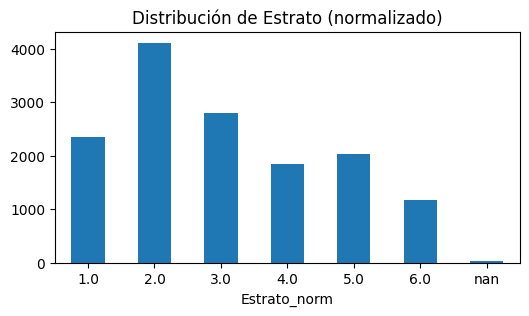

In [ ]:
# Copiamos el DF para no da√±ar el original
df_norm = df.copy()

# Paso 1: Convertir Estrato a num√©rico
df_norm["Estrato_norm"] = pd.to_numeric(df_norm["Estrato"], errors="coerce")

# Paso 2: Corregir casos fuera de rango (solo v√°lidos 1 a 6)
df_norm.loc[~df_norm["Estrato_norm"].between(1, 6), "Estrato_norm"] = np.nan

# Paso 3: Revisar distribuci√≥n
print("Distribuci√≥n normalizada de Estrato:")
display(df_norm["Estrato_norm"].value_counts(dropna=False).sort_index())

# Paso 4: Gr√°fico normalizado
df_norm["Estrato_norm"].value_counts(dropna=False).sort_index().plot(
    kind="bar", figsize=(6,3), title="Distribuci√≥n de Estrato (normalizado)"
)
plt.xticks(rotation=0)
plt.show()


Variables num√©ricas (adem√°s del ICFES)

Revisa si tienes m√°s columnas num√©ricas, por ejemplo:


*   Edad del admitido
*   Puntajes espec√≠ficos (lectura, matem√°ticas, etc.)
*   A√±o de admisi√≥n

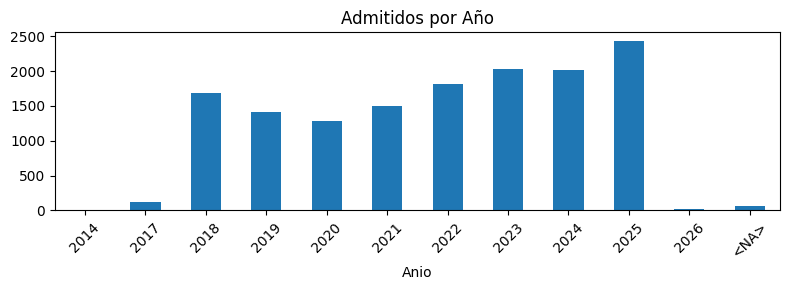

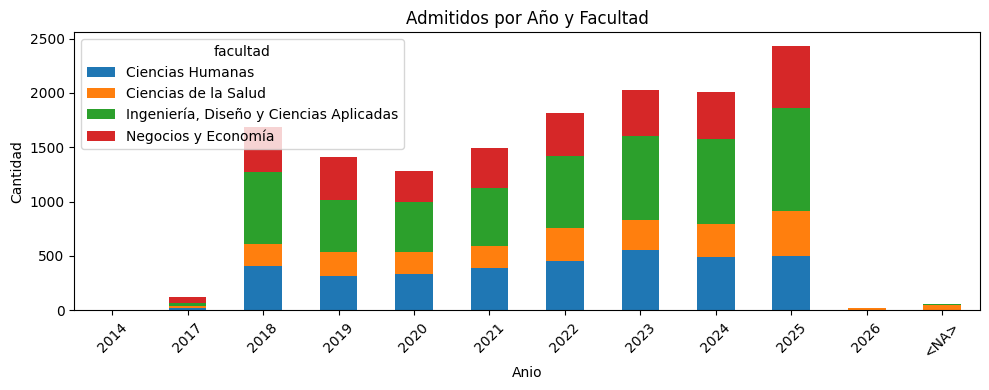

In [ ]:
# 1) Ajusta el nombre exacto si cambia
col_periodo = "Periodo Admisi√≥n"

# 2) Derivar a√±o y semestre desde AAAASS
df["Periodo_str"] = df[col_periodo].astype("Int64").astype(str)
df["Anio"]       = df["Periodo_str"].str[:4]
df["Semestre"]   = df["Periodo_str"].str[4:6]

# 3) Barras: admitidos por a√±o
df["Anio"].value_counts().sort_index().plot(kind="bar", figsize=(8,3), title="Admitidos por A√±o")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# 4) Barras apiladas: a√±o x facultad
pd.crosstab(df["Anio"], df["facultad"]).plot(kind="bar", stacked=True, figsize=(10,4))
plt.title("Admitidos por A√±o y Facultad"); plt.ylabel("Cantidad")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

